In [15]:



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Lending Club Load data Analysis project ####

In [16]:
data = pd.read_csv("loan_data.csv")

In [17]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [19]:
#understanding the dataset
data.shape

(9578, 14)

In [20]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [21]:
#Transforming categorical values into numerical values (discrete)
data.sample(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
8856,0,credit_card,0.1272,268.48,10.778956,18.50,677,1830.000000,7368,82.8,4,0,0,1
9098,0,all_other,0.1158,79.24,10.126631,19.54,727,3210.000000,268,26.8,5,0,0,0
7008,1,debt_consolidation,0.0859,410.94,11.512925,18.35,782,5580.041667,6031,5.8,2,0,0,0
8923,0,educational,0.1821,507.62,11.270854,16.45,662,4531.041667,95801,82.8,7,0,0,1
3695,1,debt_consolidation,0.1442,144.41,9.680344,11.10,677,1140.000000,3830,64.9,0,0,0,0
981,1,debt_consolidation,0.1134,210.56,10.858999,16.98,692,1469.958333,2898,41.4,0,0,0,0
4564,1,all_other,0.0774,78.05,10.645425,6.49,737,6359.958333,967,10.1,1,0,0,0
8418,0,all_other,0.1261,723.74,11.736069,16.94,687,4020.000000,167006,53.5,3,0,0,1
5713,1,debt_consolidation,0.1218,616.05,11.589887,2.38,722,2280.041667,120,0.8,1,0,0,0
7048,1,debt_consolidation,0.1322,253.51,10.896739,15.56,697,7923.041667,4552,25.6,1,0,0,0


In [22]:
np.unique(data['credit.policy'], return_counts=True)

(array([0, 1]), array([1868, 7710]))

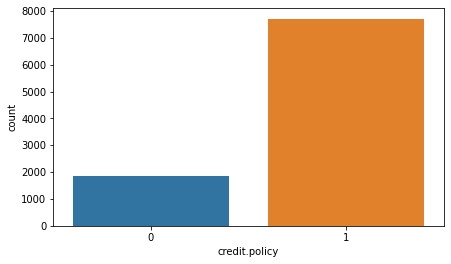

In [23]:
plt.figure(figsize=(7, 4))
sns.countplot(x=data['credit.policy']);

In [24]:
data.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [25]:
df_col_info = pd.DataFrame(data.dtypes, columns= ['col_data_type'])

df_col_info_names_changed = df_col_info.reset_index()

df_col_info_names_changed.columns = ['col_names', 'col_data_type']
df_col_info_names_changed

,col_names,col_data_type
0,credit.policy,int64
1,purpose,object
2,int.rate,float64
3,installment,float64
4,log.annual.inc,float64
5,dti,float64
6,fico,int64
7,days.with.cr.line,float64
8,revol.bal,int64
9,revol.util,float64


In [26]:
df_col_info_count = pd.DataFrame(df_col_info_names_changed.groupby("col_data_type").count().reset_index())

df_col_info_count.columns= ['col_name', 'dtype']
df_col_info_count                            

,col_name,dtype
0,int64,7
1,float64,6
2,object,1


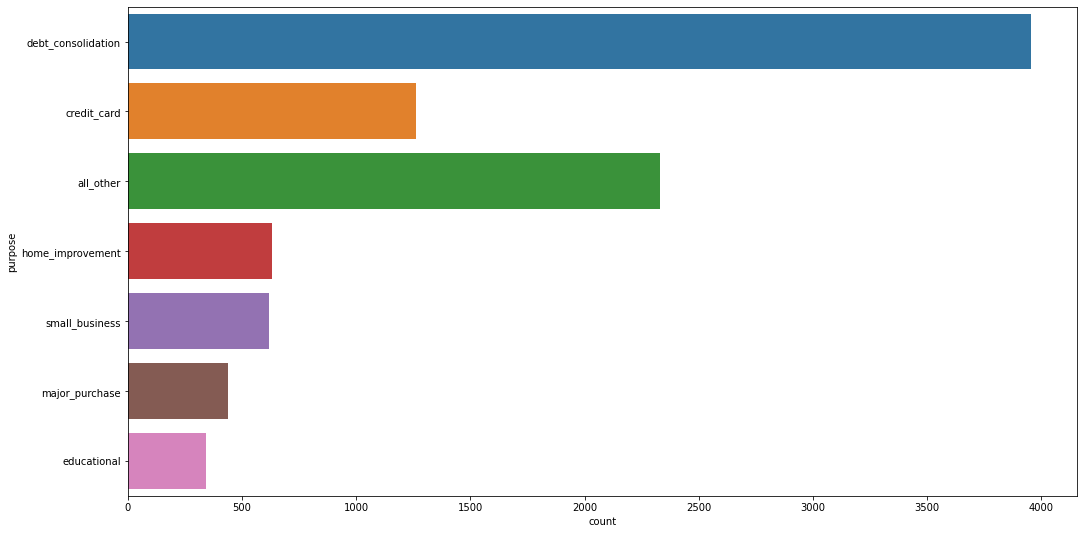

In [27]:
plt.figure(figsize=(17, 9))
sns.countplot(y=data['purpose']);

In [11]:
#Null value Analysis
NAs= pd.concat([data.isnull().sum()], axis=1)

NAs[NAs.sum(axis=1)>0]

,0


In [28]:
pd.set_option('display.float_format', lambda x:'%.4f' % x)

In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0000,0.8050,0.3962,0.0000,1.0000,1.0000,1.0000,1.0000
int.rate,9578.0000,0.1226,0.0268,0.0600,0.1039,0.1221,0.1407,0.2164
installment,9578.0000,319.0894,207.0713,15.6700,163.7700,268.9500,432.7625,940.1400
log.annual.inc,9578.0000,10.9321,0.6148,7.5475,10.5584,10.9289,11.2913,14.5284
dti,9578.0000,12.6067,6.8840,0.0000,7.2125,12.6650,17.9500,29.9600
fico,9578.0000,710.8463,37.9705,612.0000,682.0000,707.0000,737.0000,827.0000
days.with.cr.line,9578.0000,4560.7672,2496.9304,178.9583,2820.0000,4139.9583,5730.0000,17639.9583
revol.bal,9578.0000,16913.9639,33756.1896,0.0000,3187.0000,8596.0000,18249.5000,1207359.0000
revol.util,9578.0000,46.7992,29.0144,0.0000,22.6000,46.3000,70.9000,119.0000
inq.last.6mths,9578.0000,1.5775,2.2002,0.0000,0.0000,1.0000,2.0000,33.0000


<AxesSubplot:>

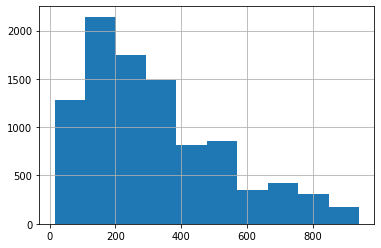

In [30]:
data.installment.hist()

<AxesSubplot:>

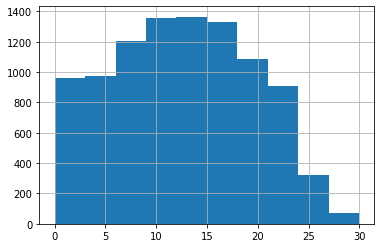

In [69]:
data.dti.hist()

<AxesSubplot:>

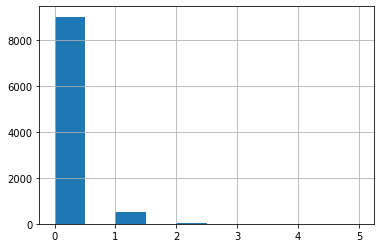

In [71]:
data['pub.rec'].hist()

In [15]:
# evaluating the usefulness of the records

data.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [31]:
data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [32]:
col_to_evaluate = ['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']

In [33]:
from scipy import stats

In [34]:
# Forming 2 datasets from the original dataset as subsets

class1 = data[(data['credit.policy'] == 0)]
class1.reset_index(inplace= True)

class2 = data[(data['credit.policy'] == 1)]
class2.reset_index(inplace = True)

In [35]:
stats.ttest_ind(class1['int.rate'],class2['int.rate'])[1]

2.1945619717925775e-190

#### Since the predicted value is much lower than 5% then it is usefull for Machine learning model 
#### this means we can create a model for the columns

In [36]:
for each_col in col_to_evaluate:
    col1 = pd.to_numeric(class1[each_col], errors='coerce')
    col2 = pd.to_numeric(class2[each_col], errors='coerce')
    
    p_value = stats.ttest_ind(col1, col2, nan_policy='omit')[1]
    
    if p_value < 0.05:
        # Column is useful
        print("The column '{}' is useful with a p-value of {}".format(each_col, p_value))
    else:
        # Column is not useful
        print("The column '{}' is not useful with a p-value of {}".format(each_col, p_value))

The column 'credit.policy' is useful with a p-value of 0.0
The column 'purpose' is not useful with a p-value of 0.0
The column 'int.rate' is useful with a p-value of 2.1945619717925775e-190
The column 'installment' is useful with a p-value of 8.620919919293774e-09
The column 'log.annual.inc' is useful with a p-value of 0.0006337324172009995
The column 'dti' is useful with a p-value of 4.945272027510337e-19
The column 'fico' is useful with a p-value of 2.6100416830751396e-271
The column 'days.with.cr.line' is useful with a p-value of 2.627126143480234e-22
The column 'revol.bal' is useful with a p-value of 1.592869483344647e-76
The column 'revol.util' is useful with a p-value of 1.7179159037327666e-24


/usr/local/lib/python3.7/site-packages/scipy/stats/mstats_basic.py:1050: RuntimeWarning: divide by zero encountered in true_divide
  denom = ma.sqrt(svar*(1.0/n1 + 1.0/n2))  # n-D computation here!


In [37]:
cols_to_evaluate2 = ['inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']

#### Categorical usefulness

In [38]:
from scipy.stats import chi2_contingency

In [39]:
#Tests for the relationships

chi_res = chi2_contingency(pd.crosstab(data['credit.policy'],data['not.fully.paid']))

In [40]:
chi_res

(238.3788010698609,
 8.87573133930704e-54,
 1,
 array([[1569.01858426,  298.98141574],
        [6475.98141574, 1234.01858426]]))

In [41]:
chi2_contingency(pd.crosstab(data['credit.policy'],data['not.fully.paid']))[1]

8.87573133930704e-54

In [42]:
for each_col in cols_to_evaluate2 :
    
    chi2_contingency(pd.crosstab(data['credit.policy'],data['not.fully.paid']))[1]
    
    if p_value < 0.05:
        # Column is useful
        print("The column '{}' is useful with a p-value of {}".format(each_col, p_value))
    else:
        # Column is not useful
        print("The column '{}' is not useful with a p-value of {}".format(each_col, p_value))

The column 'inq.last.6mths' is useful with a p-value of 1.7179159037327666e-24
The column 'delinq.2yrs' is useful with a p-value of 1.7179159037327666e-24
The column 'pub.rec' is useful with a p-value of 1.7179159037327666e-24
The column 'not.fully.paid' is useful with a p-value of 1.7179159037327666e-24


#### encoding cat columns

In [43]:
data_dummies= pd.get_dummies(data)

In [44]:
data_dummies.sample(10)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
7721,0,0.1229,250.1500,10.7364,3.0300,672,983.0000,5556,27.1000,2,0,0,0,0,0,0,0,1,0,0
1822,1,0.1253,83.6700,10.8199,10.9200,682,5610.0417,3510,41.8000,2,0,0,0,0,0,0,0,1,0,0
9114,0,0.1347,220.5000,10.5713,17.6900,727,1199.9583,0,0.0000,5,0,0,0,0,0,0,0,0,1,0
307,1,0.0743,124.3000,11.0429,5.8200,772,5430.0000,773,4.8000,0,0,0,0,0,0,0,0,1,0,0
8504,0,0.1418,68.5400,10.4913,17.1700,647,719.9583,5065,84.4000,3,0,0,0,0,1,0,0,0,0,0
508,1,0.0800,94.0100,10.0432,12.0500,742,1259.0417,710,7.8000,4,0,0,0,1,0,0,0,0,0,0
3654,1,0.1221,333.1500,11.4076,22.4700,737,7740.0000,61374,61.8000,2,0,0,0,0,1,0,0,0,0,0
8949,0,0.1884,109.7400,10.3090,23.3600,662,1590.0417,2994,99.8000,5,0,0,1,0,0,1,0,0,0,0
4470,1,0.1183,497.0100,12.3588,8.5300,727,4920.9583,23474,38.1000,1,0,0,0,0,0,0,0,0,1,0
5873,1,0.1635,565.2700,12.1495,18.7600,662,7140.0417,31742,84.4000,0,1,0,0,0,0,1,0,0,0,0


In [45]:
data_dummies.sample(10).T

,2942,3176,6993,4731,3248,883,5377,3629,9165,7871
credit.policy,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000
int.rate,0.1411,0.1253,0.1357,0.2017,0.0932,0.1450,0.1287,0.0932,0.1758,0.1343
installment,198.5300,184.0700,407.6300,186.2600,319.4700,640.2400,210.2100,102.2300,359.4200,81.3700
log.annual.inc,11.3504,10.9135,10.6454,10.8198,10.0732,11.2252,10.2150,9.6803,11.5617,9.9035
dti,4.6200,17.5500,21.7700,6.0000,10.0800,22.7400,23.7300,0.0000,15.8900,11.6400
fico,687.0000,682.0000,682.0000,672.0000,747.0000,682.0000,692.0000,737.0000,662.0000,652.0000
days.with.cr.line,2010.0000,7590.0000,5130.0000,5009.9583,3540.0000,5969.9583,3239.9583,2100.0000,3180.0000,2819.9583
revol.bal,6419.0000,19279.0000,7263.0000,9814.0000,8596.0000,32682.0000,9166.0000,0.0000,9705.0000,233.0000
revol.util,45.5000,59.5000,60.0000,59.5000,29.7000,96.1000,73.9000,0.0000,78.9000,15.1000
inq.last.6mths,0.0000,1.0000,2.0000,1.0000,0.0000,0.0000,2.0000,0.0000,5.0000,0.0000


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


In [47]:
x_df = data.drop(['credit.policy'], axis=1)
y_df = data['credit.policy']

####Building a Model

In [48]:
data_transf = ColumnTransformer([('std-sclr',StandardScaler(),['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util'])], remainder = 'passthrough')

###Scaling

In [49]:
x_df_encoded = pd.get_dummies(x_df, columns=['purpose'])

data_transf = StandardScaler()

In [50]:
X_scaled = data_transf.fit_transform(x_df_encoded)

In [51]:
y = y_df.values

####Using multi-collinearity

In [52]:
y = data['credit.policy'].values

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [54]:
X = data.drop(['credit.policy','purpose'],axis = 1)

In [55]:
X.values

array([[1.18900000e-01, 8.29100000e+02, 1.13504065e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.07100000e-01, 2.28220000e+02, 1.10821426e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.35700000e-01, 3.66860000e+02, 1.03734912e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.07100000e-01, 9.78100000e+01, 1.05966347e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.60000000e-01, 3.51580000e+02, 1.08197783e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.39200000e-01, 8.53430000e+02, 1.12644641e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [56]:
mod = pd.DataFrame()
mod['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
mod['feature'] = X.columns
mod = mod.sort_values(by='VIF_Factor', ascending=False).round(5)

print(mod)

    VIF_Factor            feature
2     377.0961     log.annual.inc
4     278.9056               fico
0      35.2293           int.rate
7       5.6752         revol.util
5       5.2466  days.with.cr.line
3       5.0872                dti
1       4.2039        installment
8       1.6652     inq.last.6mths
6       1.5606          revol.bal
11      1.2471     not.fully.paid
9       1.2000        delinq.2yrs
10      1.1004            pub.rec


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= .25)

In [61]:
ml_model = RandomForestClassifier()

ml_model.fit(X_train,y_train)

y_pred_train = ml_model.predict(X_train)
y_pred = ml_model.predict(X_test)

print("train_ing accuracy score:", metrics.accuracy_score(y_train, y_pred_train))
print("train_ing accuracy score:", metrics.accuracy_score(y_test, y_pred))

train_ing accuracy score: 1.0
train_ing accuracy score: 0.9878914405010438


In [62]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       503
           1       0.99      1.00      0.99      1892

    accuracy                           0.99      2395
   macro avg       0.99      0.97      0.98      2395
weighted avg       0.99      0.99      0.99      2395



In [63]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 477,   26],
       [   3, 1889]])

####Random Foresting the model

In [64]:
num_trees_list = [1,2,3,4,5,7,10]


In [65]:
train_ = []
test_ = []

for num_trees in num_trees_list:
    tres_= RandomForestClassifier(n_estimators = num_trees)
    
    tres_.fit(X_train,y_train)
    
    train_pred = tres_.predict(X_train)
    
    order = metrics.accuracy_score(y_train, train_pred)
    
    train_.append(order)
    test_pred = tres_.predict(X_test)
    
    order = metrics.accuracy_score(y_test, test_pred)
    
    test_.append(order)

In [66]:
num_estimators = [3,5,7,9,11,13,15,17,19,21]
max_depths = [2,4,6,8,10,12,14]
min_samples_split = np.linspace(.01,.05, 6)

In [67]:
parameters = dict(
                
                max_depths = max_depths,
                min_samples_split = min_samples_split,
                estimatead = num_estimators
        )

print(parameters)

{'max_depths': [2, 4, 6, 8, 10, 12, 14], 'min_samples_split': array([0.01 , 0.018, 0.026, 0.034, 0.042, 0.05 ]), 'estimatead': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}


In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [69]:
model = RandomForestClassifier()

In [53]:
parameters = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


Grid = GridSearchCV(
    estimator=model,
    param_grid=parameters,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1
)
Grid.fit(X_scaled, y)



Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [54]:
Grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [70]:
ml_model = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=50
    #Balanced
)


ml_model.fit(X_train,y_train)

y_pred_train = ml_model.predict(X_train)
y_pred = ml_model.predict(X_test)

print("train_ing accuracy score:", metrics.accuracy_score(y_train, y_pred_train))
print("train_ing accuracy score:", metrics.accuracy_score(y_test, y_pred))

train_ing accuracy score: 0.9979117360434359
train_ing accuracy score: 0.9878914405010438


In [71]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 479,   24],
       [   5, 1887]])

In [72]:
from sklearn.linear_model import LogisticRegression

In [84]:
ml_model = LogisticRegression()


ml_model.fit(X_train,y_train)

y_pred_train = ml_model.predict(X_train)
y_pred = ml_model.predict(X_test)

print("train_ing accuracy score:", metrics.accuracy_score(y_train, y_pred_train))
print("train_ing accuracy score:", metrics.accuracy_score(y_test, y_pred))

train_ing accuracy score: 0.9043575107893638
train_ing accuracy score: 0.9081419624217119


In [164]:
####Building a model using deep learning####

In [87]:
from keras.models import Sequential
from keras.layers import Dense

In [83]:
X_train.shape

(7183, 19)

In [107]:
model = Sequential()

model.add(Dense(512, input_dim=19, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [108]:
from keras.callbacks import EarlyStopping 

In [109]:
E_stop = EarlyStopping(monitor='val_loss', mode ='min',patience= 5, verbose= 1) 

In [110]:
%%time

history = model.fit(
                    X_train,
                    y_train,
                    epochs= 100,
                    batch_size=25,
                    validation_data= (X_test,y_test),
                    verbose=1,
                    callbacks=[E_stop]
)

Epoch 1/100
288/288 [==============================] - 2s 4ms/step - loss: 0.2792 - accuracy: 0.8888 - val_loss: 0.2277 - val_accuracy: 0.9144
Epoch 2/100
288/288 [==============================] - 1s 4ms/step - loss: 0.2117 - accuracy: 0.9176 - val_loss: 0.2024 - val_accuracy: 0.9215
Epoch 3/100
288/288 [==============================] - 1s 4ms/step - loss: 0.1755 - accuracy: 0.9318 - val_loss: 0.1688 - val_accuracy: 0.9370
Epoch 4/100
288/288 [==============================] - 1s 4ms/step - loss: 0.1570 - accuracy: 0.9375 - val_loss: 0.1636 - val_accuracy: 0.9386
Epoch 5/100
288/288 [==============================] - 1s 4ms/step - loss: 0.1323 - accuracy: 0.9504 - val_loss: 0.1462 - val_accuracy: 0.9524
Epoch 6/100
288/288 [==============================] - 1s 4ms/step - loss: 0.1154 - accuracy: 0.9567 - val_loss: 0.1331 - val_accuracy: 0.9516
Epoch 7/100
288/288 [==============================] - 1s 4ms/step - loss: 0.1003 - accuracy: 0.9624 - val_loss: 0.1219 - val_accuracy: 0.9616

In [111]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(11, 7))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Accuracy')
    plt.plot(x, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training Loss')
    plt.plot(x, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    


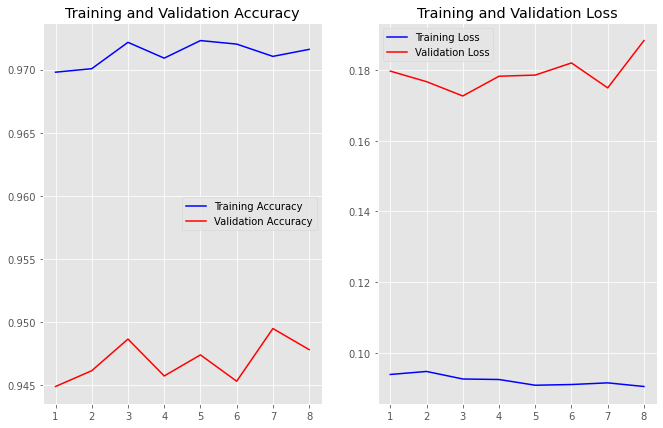

In [106]:
plot_history(history)

In [114]:
y_pred = np.squeeze((y_pred > .5 ).astype('int32'))

In [115]:
from sklearn import metrics

In [116]:
metrics.accuracy_score(y_test, y_pred)

0.9081419624217119